# Hacker Statistics: Empire State Building game

## Introduction

Imagine this situation:
You are walking up the empire state building, and you're playing with a game of friend. For 100th times, you throw a dice, if:
- 1 or 2: you go one step down (-1)
- 3, 4 or 5, you go one step up (+2)
- 6, throw another dice, you will walk up based off the resulting number
- can't step below 0, but have 0.1% of falling down, which means you will be starting from step 0 again.

with this in mind, you bet with your friend that you'll reach 60 steps high. What is the chance for you to winning this bet?

## Simulate rolling the dice

In [1]:
# numpy has the built in random function from the random sub-module
import numpy as np
import matplotlib.pyplot as plt

# passing the seed to start the random, but with predictability:
# it generates a random number, but it will generate the same random number on every sequence, if you specify the seed.
np.random.seed(123)

# use randint() will generate the number for you
# there are two arguments: first arg --> starting, second --> ending but not including
print(np.random.randint(1, 7)) # this will generate a number from 1 to 6
print(np.random.randint(1, 7))

6
3


In [2]:
# in the game, your next move depends on the resulting number that you throw. we can use if - elif - else 
# lets create the game and assume that youre on step 50
np.random.seed(123)
step = 50

dice = np.random.randint(1, 7)

# apply the game rule
if dice <= 2:
    step = step - 1
elif dice <= 5:
    step = step + 1
else:
    step = step + np.random.randint(1, 7)

# see the resulting steps youre on right now
print('dice, step', dice, step)

dice, step 6 53


## Random Walk

In [3]:
# initialze the seed
np.random.seed(123)

# initialize the random_walk
random_walk = [0]

# simulate throwing the dice 100 times
for x in range(100):
    # get the last step number
    step = random_walk[-1]
    
    # simulate rolling the dice
    dice = np.random.randint(1, 7)
    
    # apply the rules to determine the next step
    if dice <= 2:
        # when you run without max() there is a chance that it could go below 0 (-1, -2, ...)
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1, 7)
    
    # the resulting step will be pushed to the random_walk
    random_walk.append(step)

print(random_walk)

[0, 3, 4, 5, 4, 5, 6, 7, 6, 5, 4, 3, 2, 1, 0, 0, 1, 6, 5, 4, 5, 4, 5, 6, 7, 8, 9, 8, 9, 8, 9, 10, 11, 12, 11, 15, 16, 15, 16, 15, 16, 17, 18, 19, 20, 21, 22, 25, 26, 27, 28, 33, 34, 38, 39, 38, 39, 40, 39, 40, 41, 43, 44, 45, 44, 43, 44, 45, 44, 43, 44, 45, 47, 46, 45, 46, 45, 46, 47, 48, 50, 49, 50, 51, 52, 53, 54, 53, 52, 53, 52, 53, 54, 53, 56, 57, 58, 59, 58, 59, 60]


## Visualize the walk

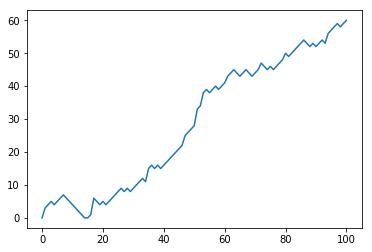

In [4]:
# we can use the matplotlib to vizualise our walk 
plt.plot(random_walk)
plt.show()

## Simulate mulitple walk to get a distribution

In [8]:
# to get the rough idea of the chances of winning the bet, we need to simulate the random walk 
# and collect the results

# initialze the seed
np.random.seed(123)

# initialize the collected walks
all_walks = []

# simulate the random walk 500 times:
for y in range(500):
    
    # initialize the random_walk
    random_walk = [0]
    
    # simulate throwing the dice 100 times
    for x in range(100):
        # get the last step number
        step = random_walk[-1]

        # simulate rolling the dice
        dice = np.random.randint(1, 7)

        # apply the rules to determine the next step
        if dice <= 2:
            # when you run without max() there is a chance that it could go below 0 (-1, -2, ...)
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1, 7)
        
        # implement clumsiness, you have a chance of 0.1% of falling down
        if np.random.rand() < 0.001:
            step = 0

        # the resulting step will be pushed to the random_walk
        random_walk.append(step)

    # collect the random_walk and append it to all_walks
    all_walks.append(random_walk)

print('All walks generated', len(all_walks), 'times.')

All walks generated 500 times.


## Vizualise all walks

[[ 0  3  2 ... 70 69 70]
 [ 0  5  4 ... 90 93 94]
 [ 0  0  1 ... 80 81 82]
 ...
 [ 0  1  2 ... 93 92 91]
 [ 0  1  0 ... 59 58 57]
 [ 0  1  0 ... 60 61 65]]


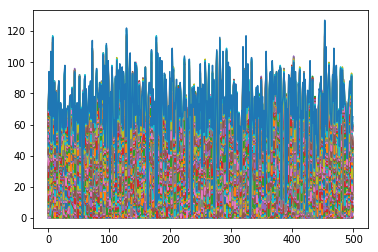

In [9]:
# first its good to convert all of our walks into numpy array
np_aw = np.array(all_walks)
print(np_aw)

# try to vizualise the plot, does it work out of the box?
plt.plot(np_aw)
plt.show()

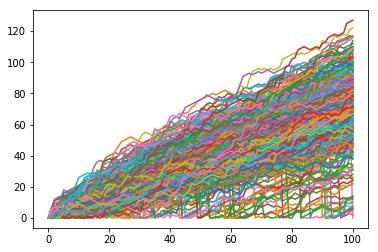

In [10]:
# it looks not so informative isnt it?
# we can transponse the data to understand what is going on...
np_aw_transposed = np.transpose(np_aw)

# try to vizualise the plot
plt.plot(np_aw_transposed)
plt.show()

## Visualize the histogram plot

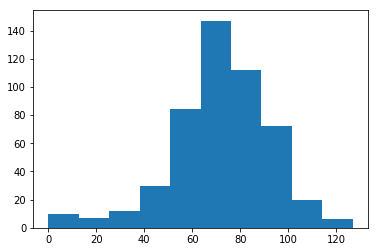

In [13]:
# to get the whole idea of the distributions, we need to plot it using histagram plot
# and we actually need the LAST result of each of the random_walks
# and because we already transposed the array of all_walks, x >< y
# all we need is to select the last row
ends = np_aw_transposed[-1]

plt.hist(ends)
plt.show()

In [18]:
# to solve the answer: what are the odds:
np_ends = np.array(ends)

total_ends = len(np_ends)
high_than_60 = len(np_ends[np_ends >= 60])
chances = high_than_60 / total_ends * 100
print('chance:', chances)

chance: 78.4
